<a href="https://colab.research.google.com/github/Adityadutar/ADITYA-DUTA-RAMADHAN_1003200025/blob/main/Tugas_IR_1_Aditya_Duta_IF_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from time import time
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE

In [3]:
# Load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [5]:
# Reshape the 28x28 pixel images into a single 784px vector using .reshape
x_train = np.reshape(x_train, (len(x_train), -1))/255
x_test = np.reshape(x_test, (len(x_test), -1))/255

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [6]:
# Set number of components to extract and scale each feature to have a variance of 1
steps = [('scaling', StandardScaler()), ('pca', PCA(n_components=0.85))]
pipeline = Pipeline(steps)
pipeline.fit(x_train)

Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA(n_components=0.85))])

In [7]:
#Check number of components extracted to account for 85% of the variance
pipeline['pca'].n_components_

185

In [8]:
reduced = pipeline.inverse_transform(pipeline.transform(x_train))

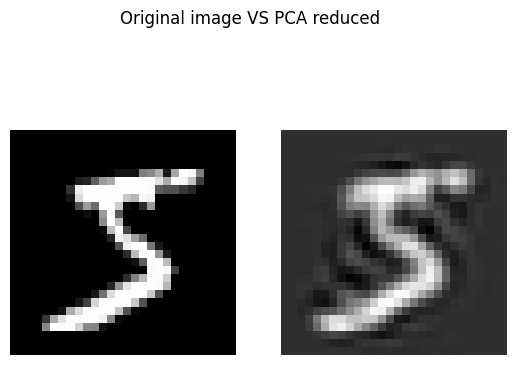

In [9]:
# let us visualize the PCA reduced number
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.matshow(x_train[0].reshape(28,28), cmap='gray')
ax2.matshow(reduced[0].reshape(28,28), cmap='gray')
ax1.set_axis_off()
ax2.set_axis_off()
fig.suptitle("Original image VS PCA reduced".format(y_train[0]))
plt.show()

In [10]:
steps = [('scaling', StandardScaler()), ('clf', SVC())]

pipeline = Pipeline(steps)

# train
t0 = time()
pipeline.fit(x_train, y_train)

# predict
y_pred = pipeline.predict(x_test)

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# confusion matrix
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

# time taken
t_all_feats = time() - t0
print("Training and classification done in {}s".format(t_all_feats))

accuracy: 0.9661 

[[ 968    0    1    1    0    3    3    2    2    0]
 [   0 1127    3    0    0    1    2    0    2    0]
 [   5    1  996    2    2    0    1   15    9    1]
 [   0    0    4  980    1    7    0   11    7    0]
 [   0    0   12    0  944    2    4    7    3   10]
 [   2    0    1   10    2  854    6    8    7    2]
 [   6    2    1    0    4    8  930    2    5    0]
 [   1    6   13    2    3    0    0  990    0   13]
 [   3    0    4    6    6    9    3   14  926    3]
 [   4    6    5   11   12    2    0   20    3  946]]
Training and classification done in 430.2857792377472s


In [11]:
# define pipeline steps
steps = [('scaling', StandardScaler()), ('reduce_dim', PCA(n_components=50)), ('clf', SVC())]
pipeline = Pipeline(steps)

# train
t0 = time()
pipeline.fit(x_train, y_train)

# predict
y_pred = pipeline.predict(x_test)

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# confusion matrix
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

t_reduced_feats = time() - t0
print("Training and classification done in {}s".format(t_reduced_feats))
print("Speedup {}x".format(t_all_feats/t_reduced_feats))

accuracy: 0.9711 

[[ 969    0    1    1    1    3    3    1    1    0]
 [   0 1126    4    1    0    1    1    0    1    1]
 [   3    0 1007    4    1    1    1    8    6    1]
 [   0    0    0  986    2    5    0    8    7    2]
 [   0    1    7    1  950    0    4    4    2   13]
 [   2    0    0   14    1  862    7    0    5    1]
 [   5    3    1    1    4    6  932    1    5    0]
 [   3    9   13    1    2    0    0  984    2   14]
 [   3    0    3    8    5    5    1    5  940    4]
 [   2    5    1    8   14    3    0   14    7  955]]
Training and classification done in 43.544548988342285s
Speedup 9.881507312268706x


<timed exec>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.


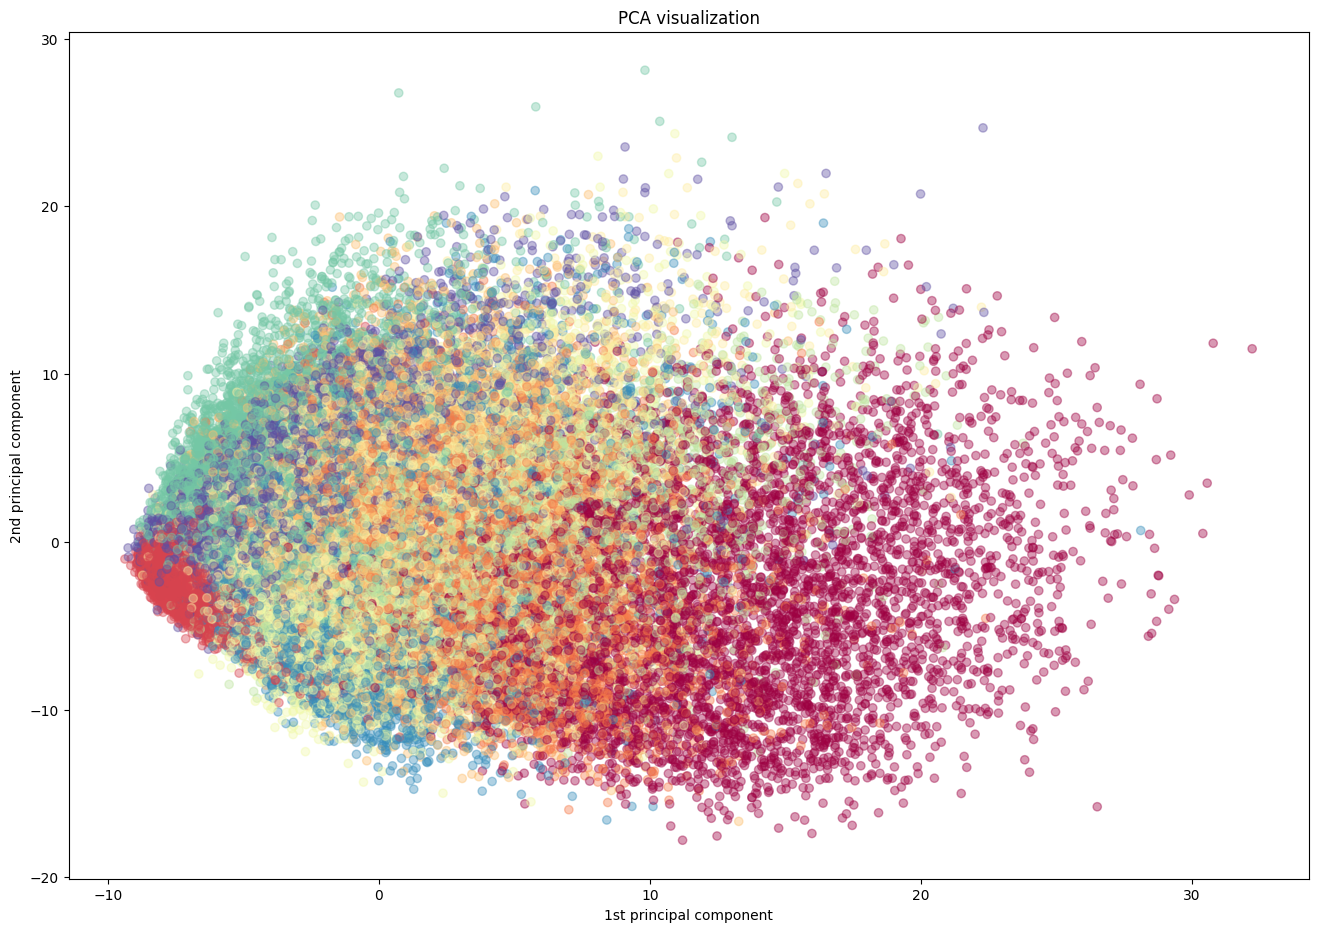

CPU times: user 5.5 s, sys: 794 ms, total: 6.29 s
Wall time: 10.1 s


In [12]:
%%time

# define pipeline steps
pca_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('dim_reduction', PCA(n_components=2))
])

pca_results =  pca_pipeline.fit_transform(x_train)

# create the scatter plot
fig, ax = plt.subplots(figsize=(16,11))
scatter = ax.scatter(
    x=pca_results[:,0],
    y=pca_results[:,1],
    c=y_train,
    cmap=plt.cm.get_cmap('Spectral'),
    alpha=0.4)

# produce a legend with the colors from the scatter
legend = ax.legend(*scatter.legend_elements(), title="Classes",bbox_to_anchor=(1.05, 1), loc='upper left',)
ax.add_artist(legend)
ax.set_title("PCA visualization")
plt.xlabel("1st principal component")
plt.ylabel("2nd principal component")
plt.show()

<timed exec>:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.


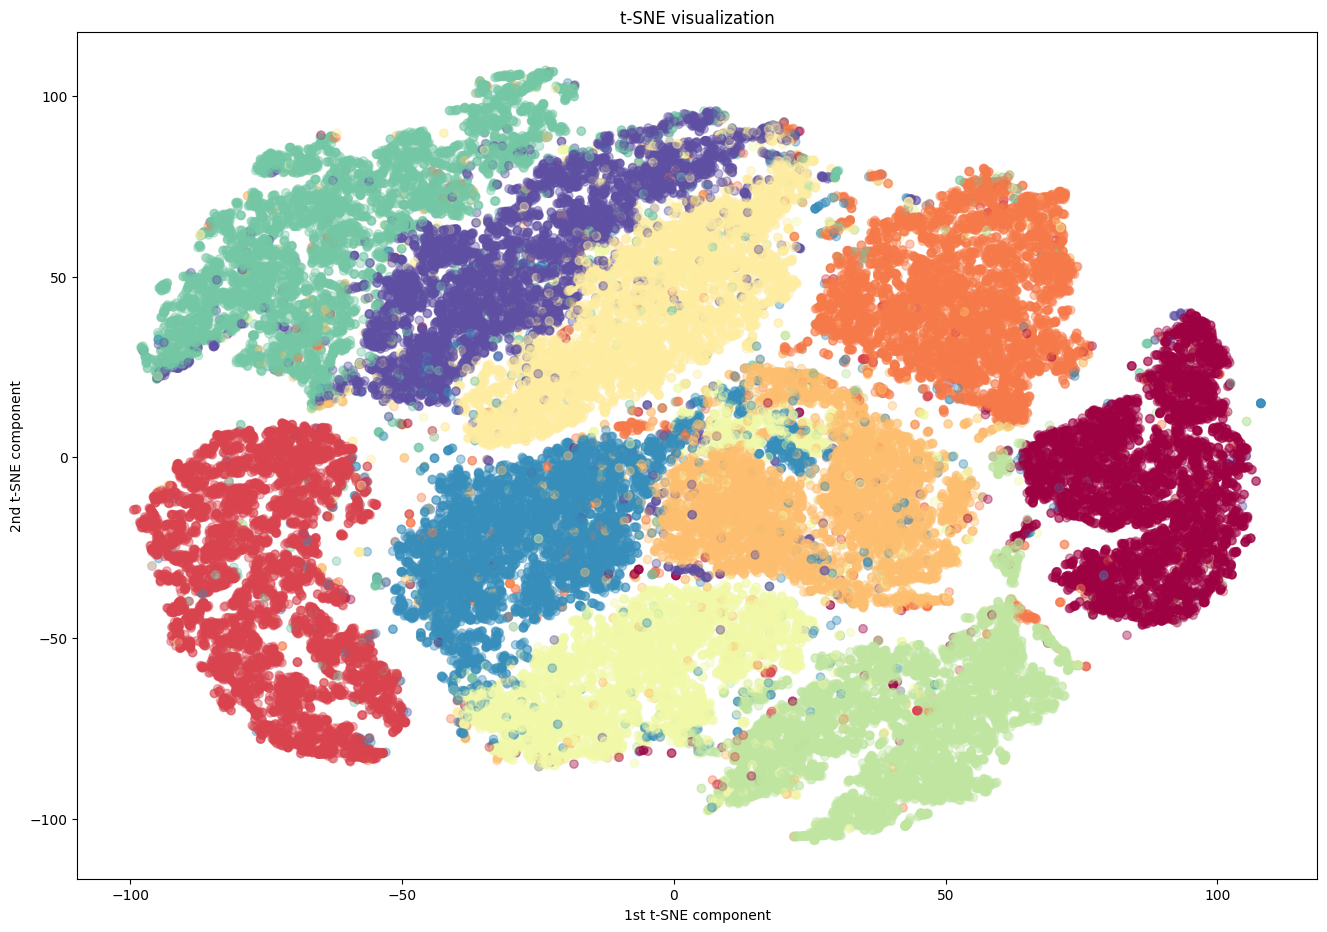

CPU times: user 17min 34s, sys: 16.3 s, total: 17min 50s
Wall time: 10min 20s


In [13]:
%%time

# define pipeline steps
tsne_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    # reduce to 50 PCA components, before t-SNE
    # otherwise, it is gonna take forever to finish…
    ('dim_reduction', PCA(n_components=50)),
    ('2d_reduction',  TSNE(n_components=2, init='pca', random_state=42))
])

tsne_results =  tsne_pipeline.fit_transform(x_train)

# Create the scatter plot
fig, ax = plt.subplots(figsize=(16,11))
scatter = ax.scatter(
    x=tsne_results[:,0],
    y=tsne_results[:,1],
    c=y_train,
    cmap=plt.cm.get_cmap('Spectral'),
    alpha=0.4)

# produce a legend with the colors from the scatter
legend = ax.legend(*scatter.legend_elements(), title="Classes",bbox_to_anchor=(1.05, 1), loc='upper left',)
ax.add_artist(legend)
ax.set_title("t-SNE visualization")
plt.xlabel("1st t-SNE component")
plt.ylabel("2nd t-SNE component")
plt.show()